<a href="https://colab.research.google.com/github/FibGro/Pyspark/blob/main/Working_with_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=c08e2799ec871aba95c2f8d8b5a315e18b8cc529acd7053743287ddee9503a1f
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession

# cluster name builder
spark = SparkSession.builder.getOrCreate()



In [ ]:
spark

In [ ]:
df1 = spark.read.format("csv").load("CompleteDataset.csv", inferSchema = True, header = True)

df1.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
# devide data into 2 partition

df1.rdd.getNumPartitions()

# repartition into 4 partition

df2 = df1.repartition(4)
df2.rdd.getNumPartitions()

4

In [ ]:
df2.show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  _c0|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [ ]:
# Rename column and amand the nulls


df2 = df2.withColumnRenamed("_c0", "ID") \
    .withColumnRenamed("Ball control", "Ball_Control") \
    .withColumnRenamed("Sliding tackle", "Sliding_Tackle")



In [ ]:
# Fill the null values

df2.na.fill({"RAM" : 10, "RB" : 1}).show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|   ID|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [ ]:
# Transformation (SELCT)

df2.select("Name", "Overall").distinct().show()

+------------------+-------+
|              Name|Overall|
+------------------+-------+
|        E. Horvath|     71|
|        M. Randall|     62|
|      A. Granqvist|     80|
|       A. Thompson|     65|
|    R. Cornthwaite|     66|
|         G. Zajkov|     62|
|       J. Cuadrado|     82|
|           M. Dube|     63|
|      A. Al Asmari|     62|
|           T. Aoki|     64|
|        M. Edwards|     58|
|           L. Amos|     60|
|       S. Kawamata|     56|
|A. Taylor-Sinclair|     60|
|       A. Bouchard|     60|
|        J. Cortizo|     58|
|     Fran Villalba|     70|
|         V. Lazaro|     71|
|         Guillermo|     70|
|         T. Ayasse|     68|
+------------------+-------+
only showing top 20 rows



In [ ]:
df2.filter(df2.Name == "E. Horvath").show()

+----+----------+---+--------------------+-------------+--------------------+-------+---------+--------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  ID|      Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|          Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK position

In [ ]:
df2.filter(df2["Overall"] > 50).show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|   ID|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [ ]:
df2.select("Name", "Overall", "Age").filter(df2["Overall"]> 50).groupby("Age").count().sort("Age").show()

+---+-----+
|Age|count|
+---+-----+
| 16|   13|
| 17|  218|
| 18|  607|
| 19| 1014|
| 20| 1226|
| 21| 1273|
| 22| 1320|
| 23| 1390|
| 24| 1331|
| 25| 1521|
| 26| 1200|
| 27| 1152|
| 28| 1050|
| 29| 1121|
| 30|  803|
| 31|  671|
| 32|  505|
| 33|  617|
| 34|  271|
| 35|  191|
+---+-----+
only showing top 20 rows



<Axes: xlabel='Age'>

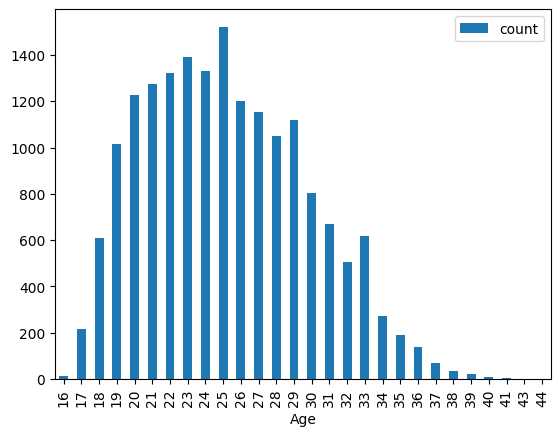

In [ ]:
df_result = df2.select("Name", "Overall", "Age").filter(df2["Overall"]> 50).groupby("Age").count().sort("Age")

pandas_df = df_result.toPandas()
pandas_df.head()

pandas_df.plot(x = "Age", y = "count", kind ='bar')

In [ ]:
# Spark S (register the DF using local temporary view)

df2.createOrReplaceTempView("df_football")

In [ ]:
# SQL Query


sql_query = """SELECT Age, count(*) as Count, Name
            FROM df_football
            WHERE Overall > 50
            GROUP BY Age, Name
            ORDER BY Age"""
result = spark.sql(sql_query)
result.show()

+---+-----+-------------+
|Age|Count|         Name|
+---+-----+-------------+
| 16|    1|     A. Gomes|
| 16|    1|    J. Romero|
| 16|    1|   E. Vignato|
| 16|    1|  R. Strechie|
| 16|    1| G. McEachran|
| 16|    1|L. Geertruida|
| 16|    1|    K. Pierie|
| 16|    1| Javi Vázquez|
| 16|    1|    L. Pintor|
| 16|    1|      J. Hove|
| 16|    1|    E. Håland|
| 16|    1|   V. Barbero|
| 16|    1|    M. Sprang|
| 17|    1|     J. Knoll|
| 17|    1|  D. Jubitana|
| 17|    1|      N. Uche|
| 17|    1|Z. Vanheusden|
| 17|    1|    L. Davies|
| 17|    1|  C. McLennan|
| 17|    1|  L. Plogmann|
+---+-----+-------------+
only showing top 20 rows



In [ ]:
# User Define Function

def uppercase_converter(record):
  if len(record) > 10:
    return record.upper()
  else:
    return record.lower()

# register the DF

df2.createOrReplaceTempView('udf_football')

# register the function

spark.udf.register("UPPER", uppercase_converter)

# use the UDF in SQL

sql_query = """SELECT Age, UPPER(Name) as Name, UPPER(Club) as Club
            FROM udf_football """
result = spark.sql(sql_query)
result.show()


+---+-----------------+--------------------+
|Age|             Name|                Club|
+---+-----------------+--------------------+
| 26|         v. moren|    WAASLAND-BEVEREN|
| 33|        c. agoste|UNIVERSIDAD CATÓLICA|
| 19|    STEVEN PRIETO|         REAL OVIEDO|
| 21|        c. alemán|ESTUDIANTES DE LA...|
| 27|       p. wiegers|   SG DYNAMO DRESDEN|
| 26|     H. YAMAGUCHI|        CEREZO OSAKA|
| 29|    D. MCGOLDRICK|        IPSWICH TOWN|
| 24|       r. teibert|VANCOUVER WHITECA...|
| 20|          i. radu|            avellino|
| 28|   P. ABRAHAMSSON|           bk häcken|
| 21|       c. burgess|   SCUNTHORPE UNITED|
| 31|            galán|      RAYO VALLECANO|
| 25|       r. andrero|      AUDAX ITALIANO|
| 31|         m. topal|       FENERBAHÇE SK|
| 23|        l. moneta|      LEGIA WARSZAWA|
| 21|        t. szántó|       SK RAPID WIEN|
| 23|          y. njie|         BOAVISTA FC|
| 20|     AARÓN MARTÍN|        RCD ESPANYOL|
| 23|K. FRIESENBICHLER|     FK AUSTRIA WIEN|
| 20|     